In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from regressione_lineare_funz import regressione



3 regressioni, in ciasuna il targhet e body mass e cambiano la features

In [2]:
dati=pd.read_csv("./penguins_size.csv")
dati

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
dati=dati[["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]]
dati

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [4]:
array=["mma","b"]
array[array=="b"]

'mma'

In [5]:
dati[["culmen_length_mm","body_mass_g"]]

,culmen_length_mm,body_mass_g
0,39.1,3750.0
1,39.5,3800.0
2,40.3,3250.0
3,NaN,NaN
4,36.7,3450.0
...,...,...
339,NaN,NaN
340,46.8,4850.0
341,50.4,5750.0
342,45.2,5200.0


In [6]:
d=dati[["culmen_length_mm","body_mass_g"]].copy()

In [7]:
d

,culmen_length_mm,body_mass_g
0,39.1,3750.0
1,39.5,3800.0
2,40.3,3250.0
3,NaN,NaN
4,36.7,3450.0
...,...,...
339,NaN,NaN
340,46.8,4850.0
341,50.4,5750.0
342,45.2,5200.0


In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   culmen_length_mm  342 non-null    float64
 1   body_mass_g       342 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


In [9]:
d.dropna(inplace=True)

In [10]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   culmen_length_mm  342 non-null    float64
 1   body_mass_g       342 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


In [11]:
d=d.values

In [12]:
x=d[:,0]
y=d[:,1]

In [13]:
regressione_larg=LinearRegression()
regressione_larg.fit(x[:,np.newaxis],y)

LinearRegression()

In [14]:
print(f"R^2 vale {regressione_larg.score(x[:,np.newaxis],y):.2f}")

R^2 vale 0.35


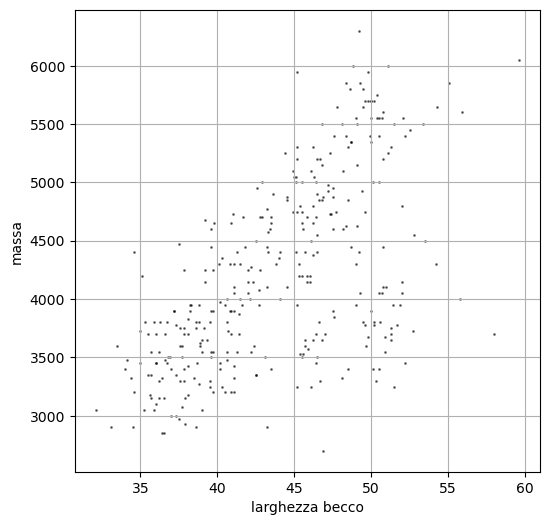

In [15]:
fig,ax=plt.subplots(figsize=(6,6))

ax.scatter(x,y,c="k",s=1.,alpha=0.5)
ax.set_xlabel("larghezza becco")
ax.set_ylabel("massa")
ax.grid()
plt.show()

In [16]:
coef_angolare=regressione_larg.coef_[0]
coef_angolare

87.41527705287548

In [17]:
term_noto=regressione_larg.intercept_
term_noto

362.3067216539225

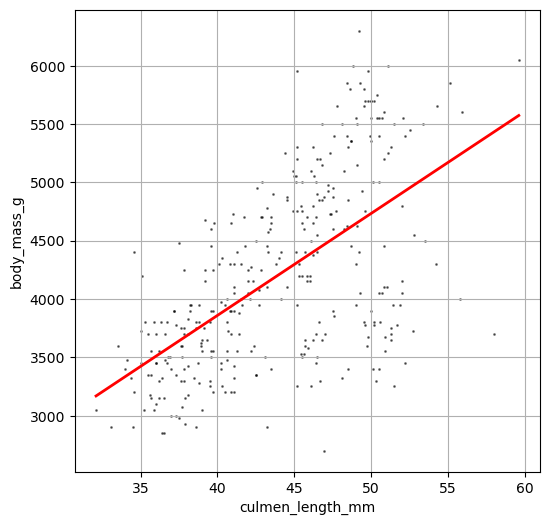

In [18]:
regressione(dati[["culmen_length_mm","body_mass_g"]],"body_mass_g")

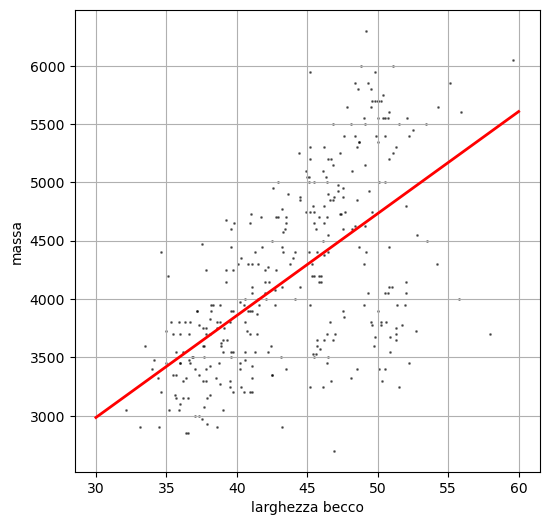

In [19]:
array_x=np.linspace(30,60,100)
array_y=coef_angolare*array_x+term_noto

fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(x,y,c="k",s=1.,alpha=0.5)
ax.plot(array_x,array_y,color="r",linewidth=2.)
ax.set_xlabel("larghezza becco")
ax.set_ylabel("massa")
ax.grid()
plt.show()

In [20]:
d2=dati[["culmen_depth_mm","body_mass_g"]].copy()
d2.dropna(inplace=True)

In [21]:
d2=d2.values
x2=d2[:,0]
y2=d2[:,1]

In [22]:
regressione_prof=LinearRegression()
regressione_prof.fit(x2[:,np.newaxis],y2)

LinearRegression()

In [23]:
print(f"R^2 vale {regressione_prof.score(x2[:,np.newaxis],y2):.2f}")

R^2 vale 0.22


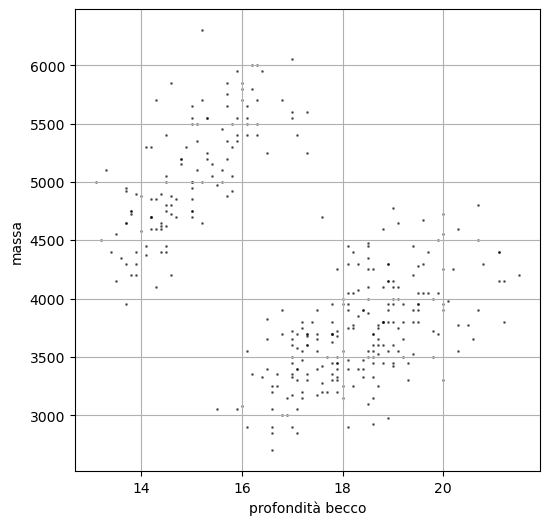

In [24]:
fig,ax=plt.subplots(figsize=(6,6))

ax.scatter(x2,y2,c="k",s=1.,alpha=0.5)
ax.set_xlabel("profondità becco")
ax.set_ylabel("massa")
ax.grid()
plt.show()

In [25]:
coef_angolare2=regressione_prof.coef_[0]
coef_angolare2

-191.64279133263315

In [26]:
term_noto2=regressione_prof.intercept_
term_noto2

7488.652400935165

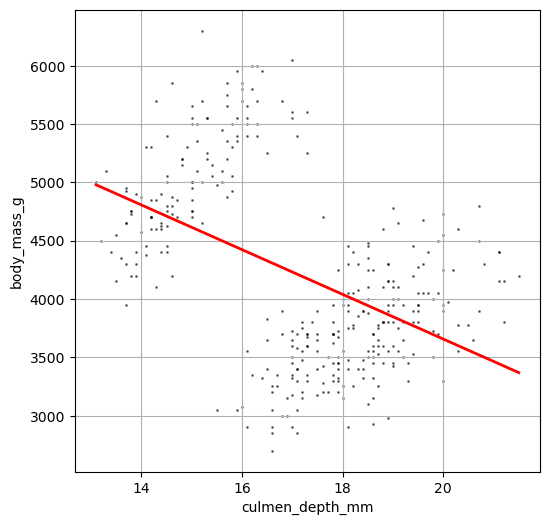

In [27]:
regressione(dati[["culmen_depth_mm","body_mass_g"]],"body_mass_g")

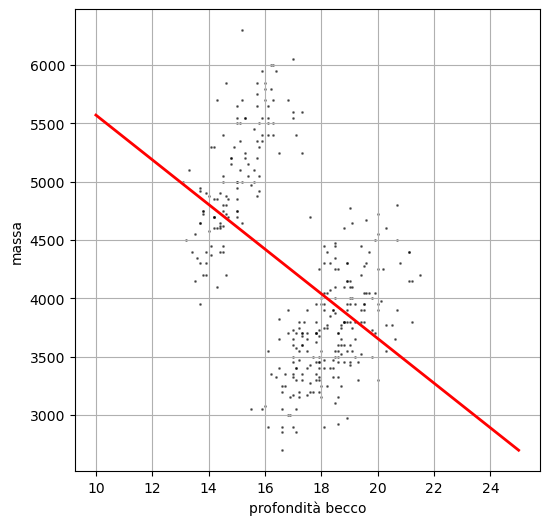

In [28]:
array_x2=np.linspace(10,25,100)
array_y2=coef_angolare2*array_x2+term_noto2

fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(x2,y2,c="k",s=1.,alpha=0.5)
ax.plot(array_x2,array_y2,color="r",linewidth=2.)
ax.set_xlabel("profondità becco")
ax.set_ylabel("massa")
ax.grid()
plt.show()

In [29]:
d3=dati[["flipper_length_mm","body_mass_g"]].copy()
d3.dropna(inplace=True)

In [30]:
d3=d3.values
x3=d3[:,0]
y3=d3[:,1]

In [31]:
regressione_pinne=LinearRegression()
regressione_pinne.fit(x3[:,np.newaxis],y3)

LinearRegression()

In [32]:
print(f"R^2 vale {regressione_pinne.score(x3[:,np.newaxis],y3):.2f}")

R^2 vale 0.76


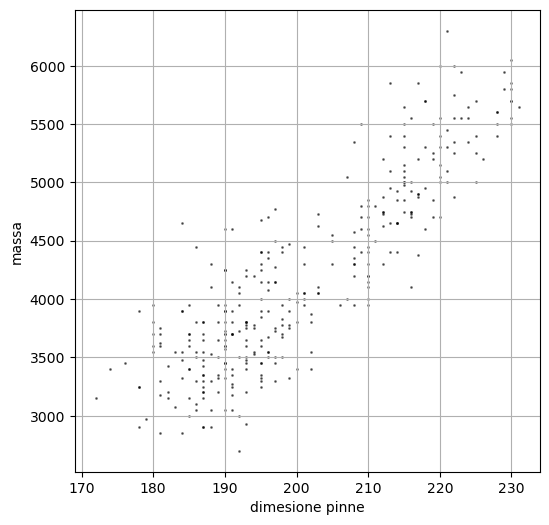

In [33]:
fig,ax=plt.subplots(figsize=(6,6))

ax.scatter(x3,y3,c="k",s=1.,alpha=0.5)
ax.set_xlabel("dimesione pinne")
ax.set_ylabel("massa")
ax.grid()
plt.show()

In [34]:
coef_angolare3=regressione_pinne.coef_[0]
coef_angolare3

49.685566406100094

In [35]:
term_noto3=regressione_pinne.intercept_
term_noto3

-5780.831358077065

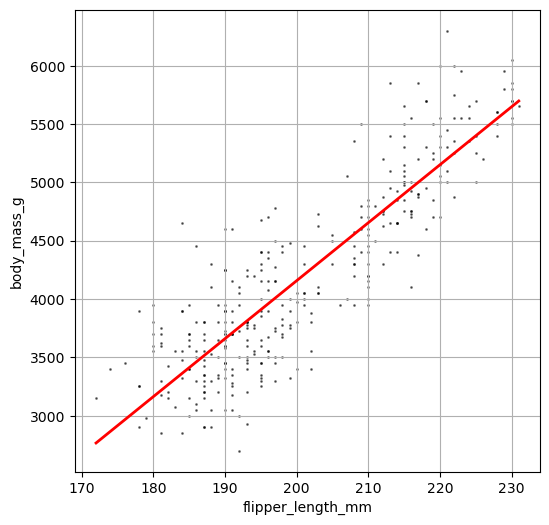

In [36]:
regressione(dati[["flipper_length_mm","body_mass_g"]],"body_mass_g")

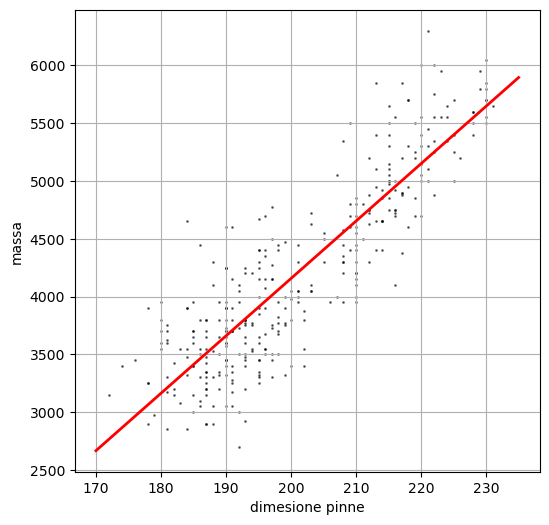

In [37]:
array_x3=np.linspace(170,235,100)
array_y3=coef_angolare3*array_x3+term_noto3

fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(x3,y3,c="k",s=1.,alpha=0.5)
ax.plot(array_x3,array_y3,color="r",linewidth=2.)
ax.set_xlabel("dimesione pinne")
ax.set_ylabel("massa")
ax.grid()
plt.show()

In [41]:
X4=dati[["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]].copy()
X4=X4.values

In [44]:
regressione4=LinearRegression()
regressione4.fit(X4,y)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values